# Analyze feature importance

In [7]:
import shap 
import joblib 
import numpy as np 
from lightgbm import plot_importance, plot_tree, create_tree_digraph
import pandas as pd
import shap

import matplotlib.pyplot as plt
%matplotlib inline

from descriptornames import *

In [8]:
CHEMICAL_FEATURES = (
    metalcenter_descriptors
    + functionalgroup_descriptors
    + linker_descriptors
    + mol_desc
    + summed_functionalgroup_descriptors
    + summed_linker_descriptors
    + summed_metalcenter_descriptors
)


In [9]:
df = pd.read_csv('../data/color_feat_merged.csv')

In [10]:
X_test = np.load('../results/gbm/X_test_run_2020_05_25_19_27_1590427678.npy')
X_train = np.load('../results/gbm/X_train_run_2020_05_25_19_27_1590427678.npy')
y_test = np.load('../results/gbm/y_test_run_2020_05_25_19_27_1590427678.npy')
test_names = np.load('../results/gbm/y_names_run_2020_05_25_19_27_1590427678.npy', allow_pickle=True)

y_scaler = joblib.load('../results/gbm/scaler_run_2020_05_25_19_27_1590427678.joblib')

vt = joblib.load('../results/gbm/vt_run_2020_05_25_19_27_1590427678.joblib')

median_estimator = joblib.load('../results/gbm/regressor_medianrun_2020_05_25_19_27_1590427678.joblib')

In [11]:
feat_filtred = vt.transform(np.array(CHEMICAL_FEATURES).reshape(1,-1)).flatten()

In [62]:
booster = median_estimator.estimators_[1]

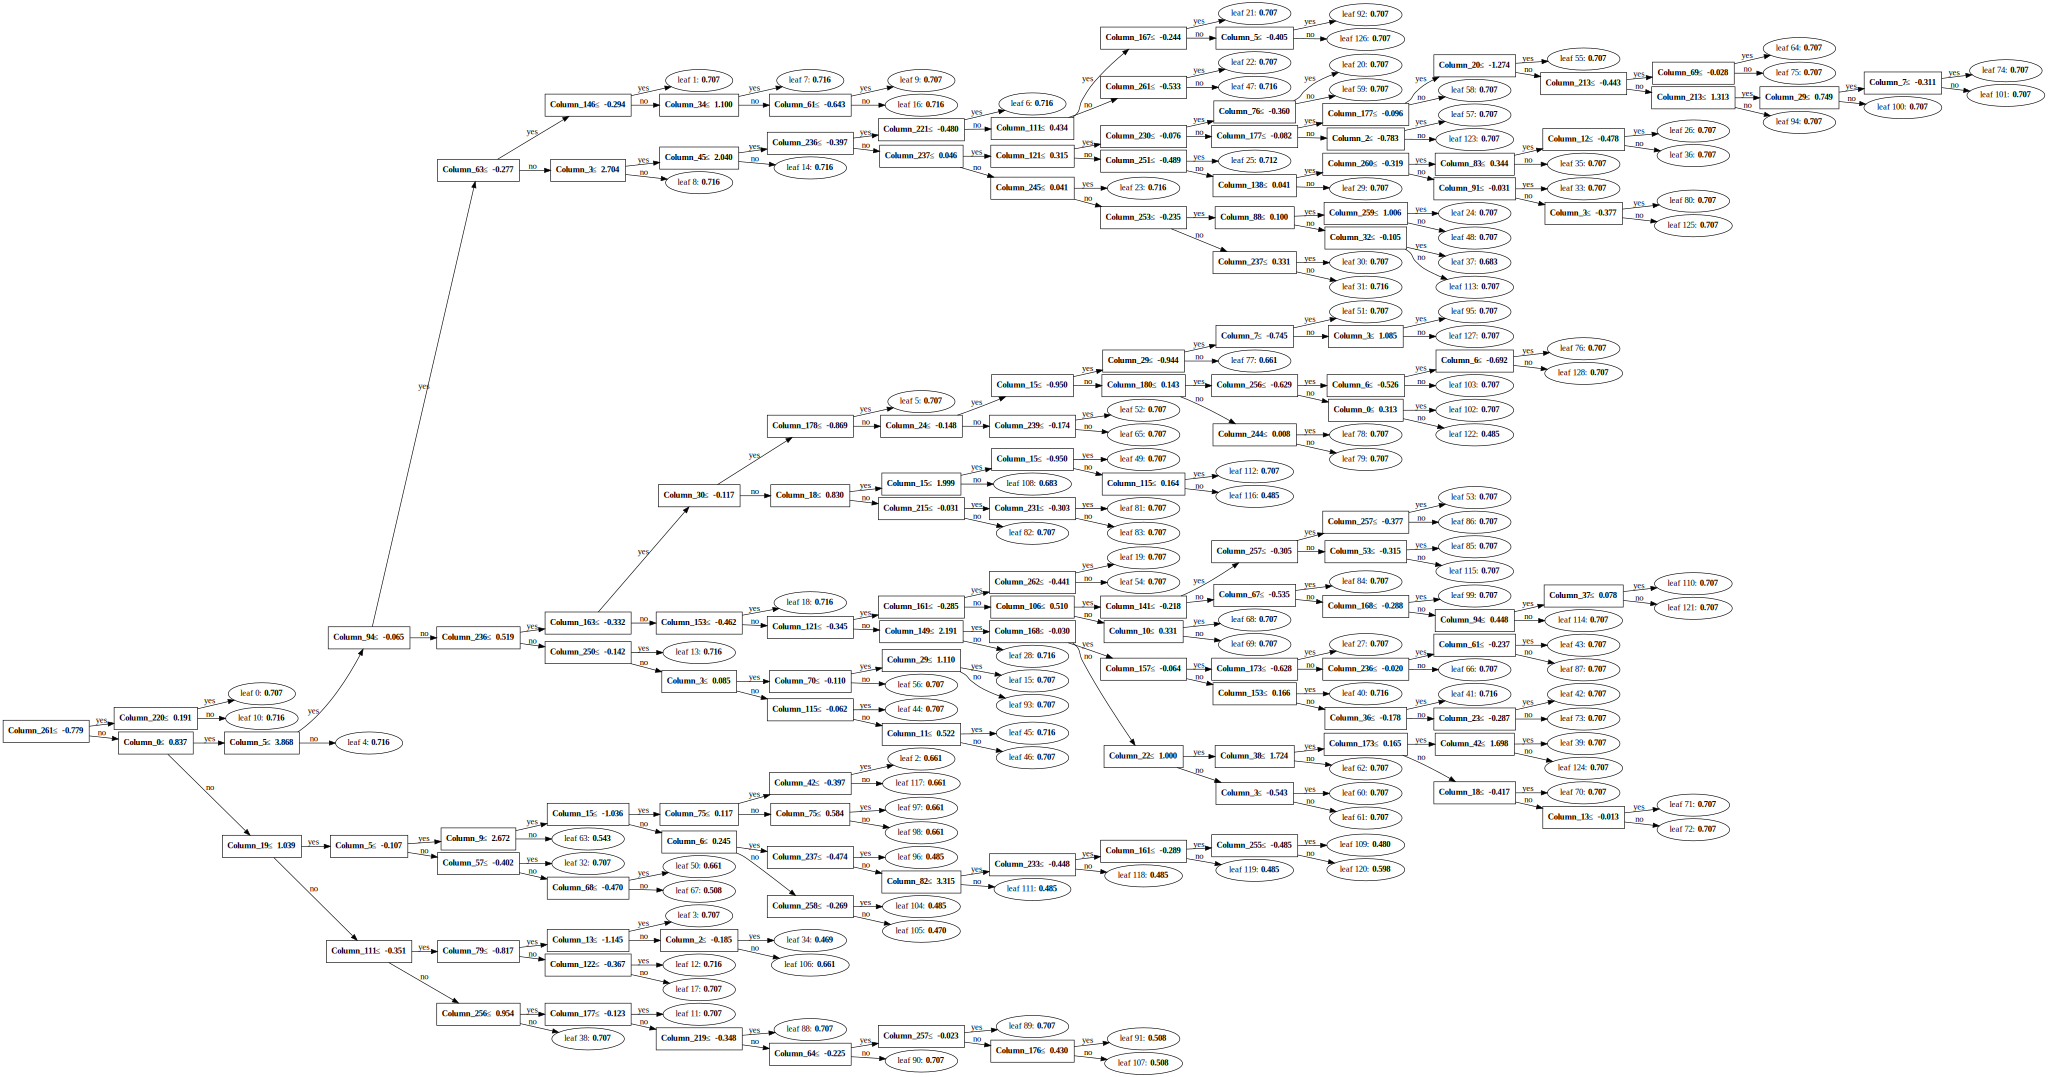

In [41]:
create_tree_digraph(booster)

In [42]:
feat_filtred[261]

'sum-D_mc_CRY-S-1-all'

In [31]:
feat_filtred

array(['mc_CRY-chi-0-all', 'mc_CRY-chi-1-all', 'mc_CRY-chi-2-all',
       'mc_CRY-chi-3-all', 'mc_CRY-Z-0-all', 'mc_CRY-Z-1-all',
       'mc_CRY-Z-2-all', 'mc_CRY-Z-3-all', 'mc_CRY-I-1-all',
       'mc_CRY-I-2-all', 'mc_CRY-I-3-all', 'mc_CRY-T-0-all',
       'mc_CRY-T-1-all', 'mc_CRY-T-2-all', 'mc_CRY-T-3-all',
       'mc_CRY-S-0-all', 'mc_CRY-S-1-all', 'mc_CRY-S-2-all',
       'mc_CRY-S-3-all', 'D_mc_CRY-chi-1-all', 'D_mc_CRY-chi-2-all',
       'D_mc_CRY-chi-3-all', 'D_mc_CRY-Z-1-all', 'D_mc_CRY-Z-2-all',
       'D_mc_CRY-Z-3-all', 'D_mc_CRY-T-1-all', 'D_mc_CRY-T-2-all',
       'D_mc_CRY-T-3-all', 'D_mc_CRY-S-1-all', 'D_mc_CRY-S-2-all',
       'D_mc_CRY-S-3-all', 'func-chi-0-all', 'func-chi-1-all',
       'func-chi-2-all', 'func-chi-3-all', 'func-Z-0-all', 'func-Z-1-all',
       'func-Z-2-all', 'func-Z-3-all', 'func-I-1-all', 'func-I-2-all',
       'func-I-3-all', 'func-T-0-all', 'func-T-1-all', 'func-T-2-all',
       'func-T-3-all', 'func-S-0-all', 'func-S-1-all', 'func-S-2-all',
   

In [66]:
feat_filtred_mc = []

feat_filtred_lc = []

feat_filtred_mc_indices = []

feat_filtred_lc_indices = []


for i, feat in enumerate(feat_filtred):
    if feat in metalcenter_descriptors:
        feat_filtred_mc.append(feat)
        feat_filtred_mc_indices.append(i)
    elif feat in linker_descriptors:
        feat_filtred_lc.append(feat)
        feat_filtred_lc_indices.append(i)
    elif feat in mol_desc: 
        feat_filtred_lc.append(feat)
        feat_filtred_lc_indices.append(i)
        

In [61]:
np.abs(shap_values[feat_filtred_mc_indices]).sum() / np.abs(shap_values[feat_filtred_lc_indices]).sum()

0.5008675512131859

In [64]:
explainer = shap.TreeExplainer(booster)

In [65]:
shap_values = explainer.shap_values(X_train[:500])

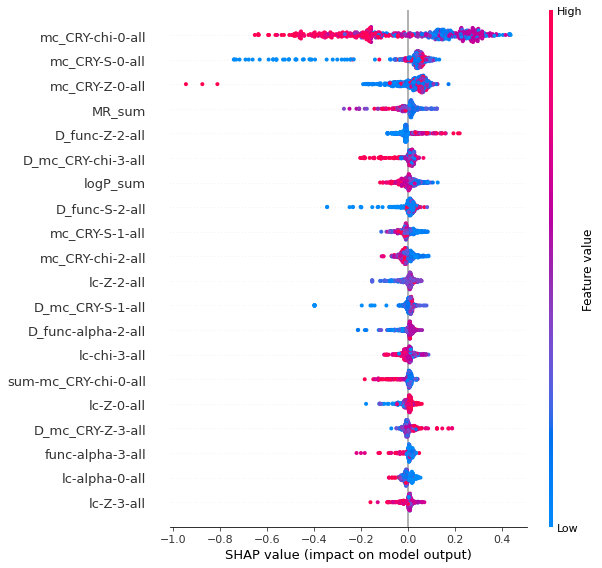

In [52]:
shap.summary_plot(shap_values, X_train[:500], feature_names=feat_filtred)

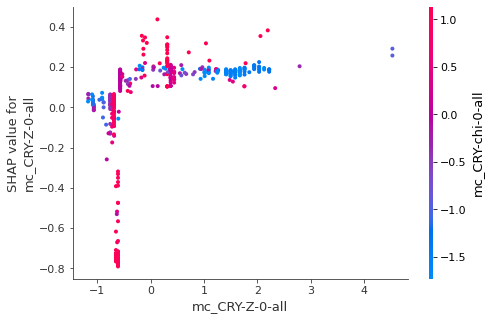

In [30]:
shap.dependence_plot("mc_CRY-Z-0-all", shap_values, X_train[:500], feature_names=feat_filtred)

In [17]:
df[['refcode', 'logP_sum', 'color_cleaned', 'sum-mc_CRY-Z-1-all']].sort_values(by='sum-mc_CRY-Z-1-all').head(20)

,refcode,logP_sum,color_cleaned,sum-mc_CRY-Z-1-all
1946,XUNTIL,-0.5549,colorless,372.0
1543,BUKYAJ,0.6293,colorless,372.0
1943,XUNSIK,-0.5549,colorless,372.0
1940,XUNHAQ,-0.5549,colorless,372.0
1938,XUNGOD,-0.5549,colorless,372.0
1939,XUNGUJ,-0.5549,colorless,372.0
350,XUNSEG,-0.5549,colorless,372.0
1106,OQOJUB,1.9966,colorless,384.0
2601,HOZFEJ,0.6900,colorless,384.0
814,MALRUM,0.0332,colorless,492.0


<BarContainer object of 264 artists>

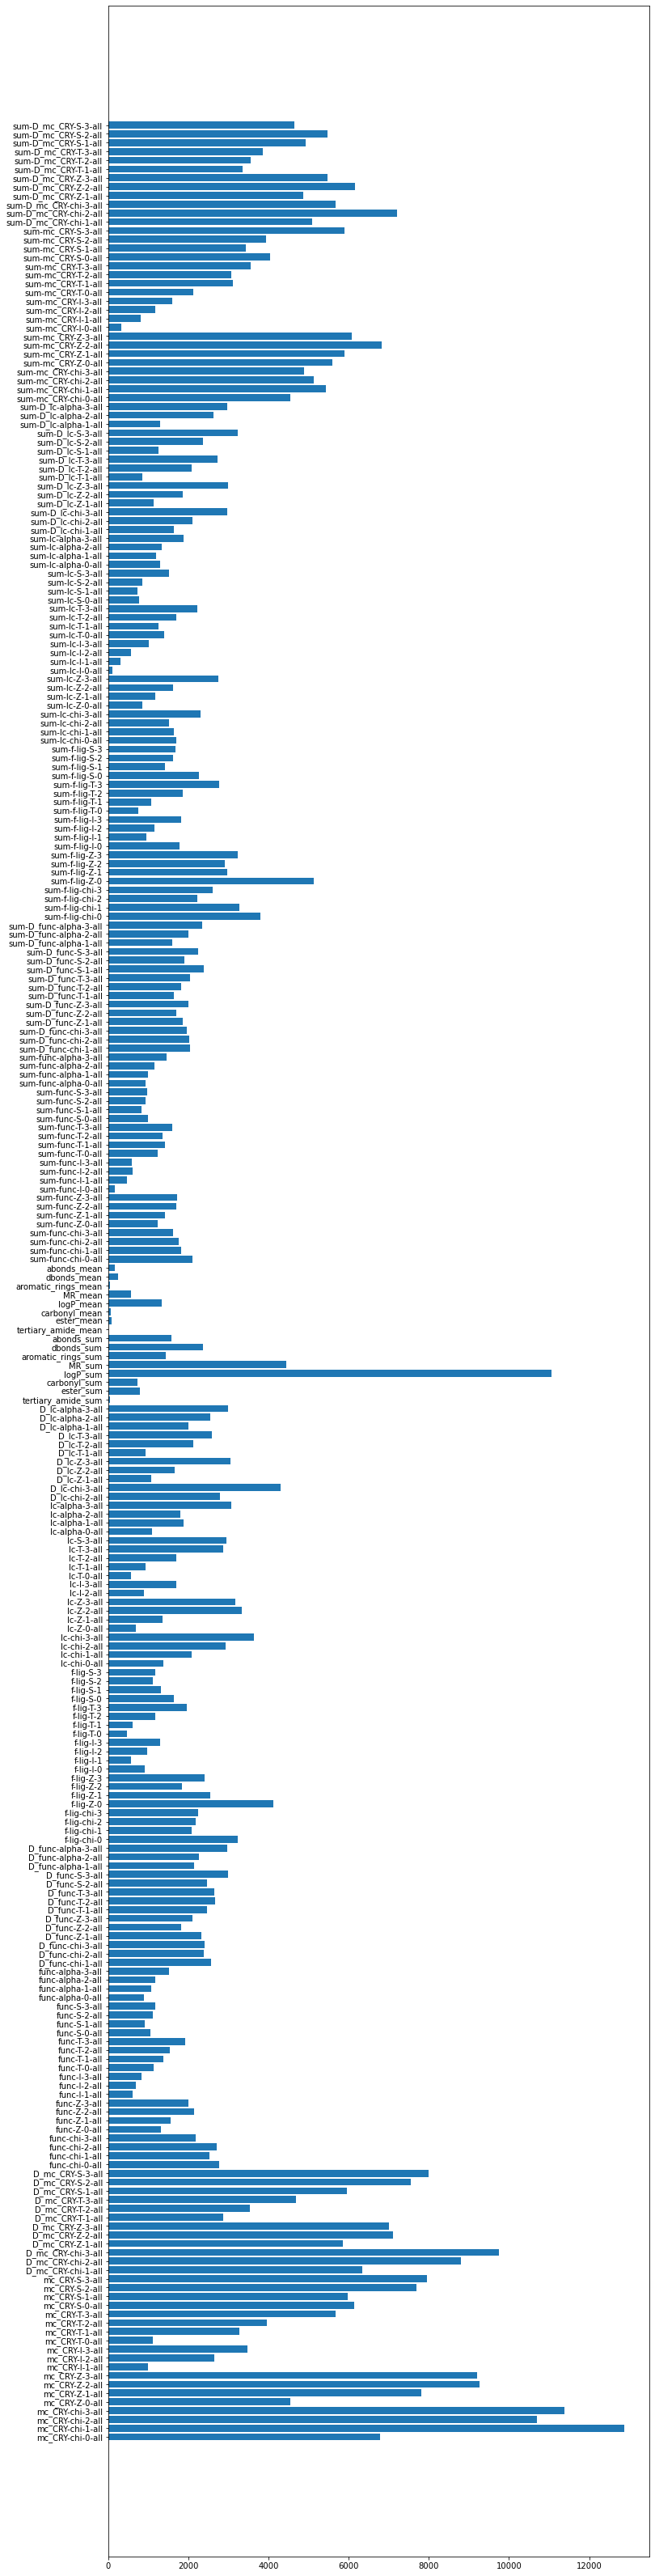

In [35]:
plt.figure(figsize=(12,58))

plt.barh(, list(booster.feature_importances_))

In [32]:
len(booster.feature_importances_)

264

In [33]:
sum(booster.feature_importances_ < 2200)

150

In [35]:
feat_filtred[~booster.feature_importances_ < 2200]

array(['mc_CRY-chi-0-all', 'mc_CRY-chi-1-all', 'mc_CRY-chi-2-all',
       'mc_CRY-chi-3-all', 'mc_CRY-Z-0-all', 'mc_CRY-Z-1-all',
       'mc_CRY-Z-2-all', 'mc_CRY-Z-3-all', 'mc_CRY-I-1-all',
       'mc_CRY-I-2-all', 'mc_CRY-I-3-all', 'mc_CRY-T-0-all',
       'mc_CRY-T-1-all', 'mc_CRY-T-2-all', 'mc_CRY-T-3-all',
       'mc_CRY-S-0-all', 'mc_CRY-S-1-all', 'mc_CRY-S-2-all',
       'mc_CRY-S-3-all', 'D_mc_CRY-chi-1-all', 'D_mc_CRY-chi-2-all',
       'D_mc_CRY-chi-3-all', 'D_mc_CRY-Z-1-all', 'D_mc_CRY-Z-2-all',
       'D_mc_CRY-Z-3-all', 'D_mc_CRY-T-1-all', 'D_mc_CRY-T-2-all',
       'D_mc_CRY-T-3-all', 'D_mc_CRY-S-1-all', 'D_mc_CRY-S-2-all',
       'D_mc_CRY-S-3-all', 'func-chi-0-all', 'func-chi-1-all',
       'func-chi-2-all', 'func-chi-3-all', 'func-Z-0-all', 'func-Z-1-all',
       'func-Z-2-all', 'func-Z-3-all', 'func-I-1-all', 'func-I-2-all',
       'func-I-3-all', 'func-T-0-all', 'func-T-1-all', 'func-T-2-all',
       'func-T-3-all', 'func-S-0-all', 'func-S-1-all', 'func-S-2-all',
   

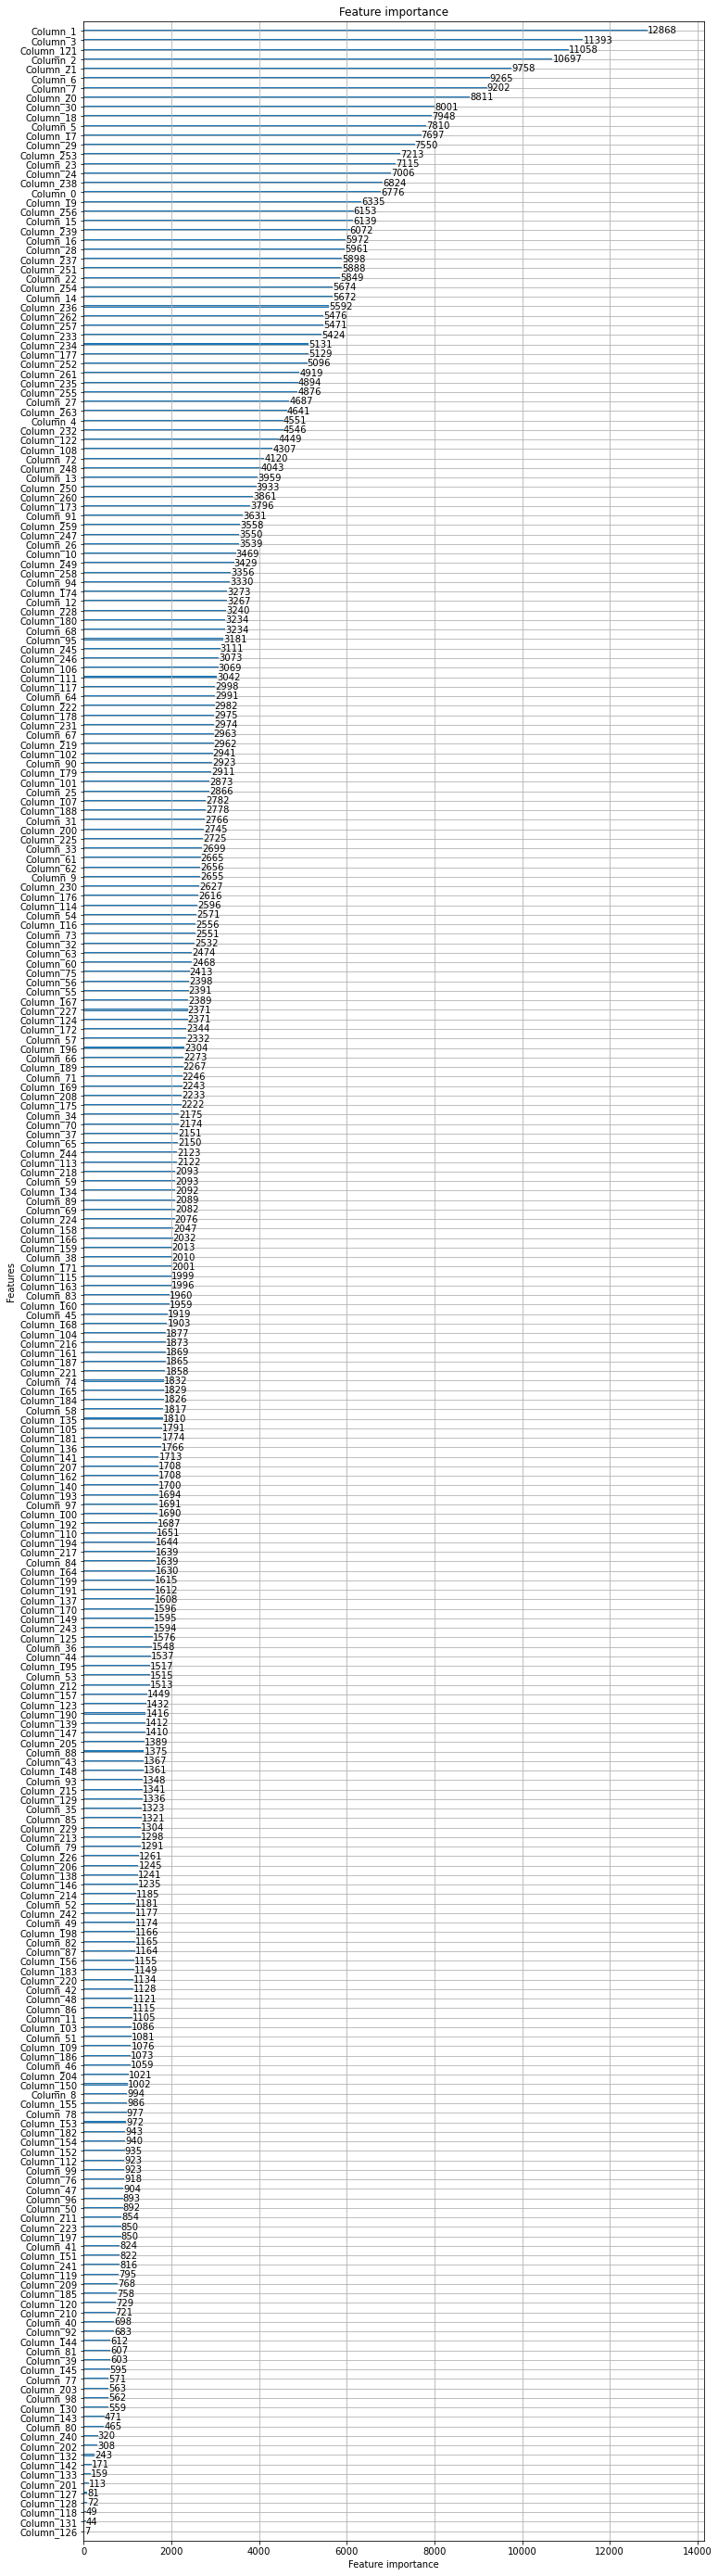

In [16]:
plot_importance(booster, figsize=(12,50))

In [7]:
median_estimator.estimators_[0].feature_importances_

array([ 6776, 12868, 10697, 11393,  4551,  7810,  9265,  9202,   994,
        2655,  3469,  1105,  3267,  3959,  5672,  6139,  5972,  7697,
        7948,  6335,  8811,  9758,  5849,  7115,  7006,  2866,  3539,
        4687,  5961,  7550,  8001,  2766,  2532,  2699,  2175,  1323,
        1548,  2151,  2010,   603,   698,   824,  1128,  1367,  1537,
        1919,  1059,   904,  1121,  1174,   892,  1081,  1181,  1515,
        2571,  2391,  2398,  2332,  1817,  2093,  2468,  2665,  2656,
        2474,  2991,  2150,  2273,  2963,  3234,  2082,  2174,  2246,
        4120,  2551,  1832,  2413,   918,   571,   977,  1291,   465,
         607,  1165,  1960,  1639,  1321,  1115,  1164,  1375,  2089,
        2923,  3631,   683,  1348,  3330,  3181,   893,  1691,   562,
         923,  1690,  2873,  2941,  1086,  1877,  1791,  3069,  2782,
        4307,  1076,  1651,  3042,   923,  2122,  2596,  1999,  2556,
        2998,    49,   795,   729, 11058,  4449,  1432,  2371,  1576,
           7,    81,

In [8]:
median_estimator.estimators_[0].feature_importances_

array([ 6776, 12868, 10697, 11393,  4551,  7810,  9265,  9202,   994,
        2655,  3469,  1105,  3267,  3959,  5672,  6139,  5972,  7697,
        7948,  6335,  8811,  9758,  5849,  7115,  7006,  2866,  3539,
        4687,  5961,  7550,  8001,  2766,  2532,  2699,  2175,  1323,
        1548,  2151,  2010,   603,   698,   824,  1128,  1367,  1537,
        1919,  1059,   904,  1121,  1174,   892,  1081,  1181,  1515,
        2571,  2391,  2398,  2332,  1817,  2093,  2468,  2665,  2656,
        2474,  2991,  2150,  2273,  2963,  3234,  2082,  2174,  2246,
        4120,  2551,  1832,  2413,   918,   571,   977,  1291,   465,
         607,  1165,  1960,  1639,  1321,  1115,  1164,  1375,  2089,
        2923,  3631,   683,  1348,  3330,  3181,   893,  1691,   562,
         923,  1690,  2873,  2941,  1086,  1877,  1791,  3069,  2782,
        4307,  1076,  1651,  3042,   923,  2122,  2596,  1999,  2556,
        2998,    49,   795,   729, 11058,  4449,  1432,  2371,  1576,
           7,    81,